## EDA (Exploratory Data Analysis)

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [12]:
path = "/home/kotarum/Documentos/Cosas/Labs/lab-customer-analysis-round-3/data_clean.csv"
df = pd.read_csv(path)


df.drop(columns=['Unnamed: 0', 'unnamed: 0'], inplace=True)

### DataFrame info

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4819 entries, 0 to 4818
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       4819 non-null   object 
 1   state                          4819 non-null   object 
 2   customer lifetime value        4819 non-null   float64
 3   response                       4819 non-null   object 
 4   coverage                       4819 non-null   object 
 5   education                      4819 non-null   object 
 6   effective to date              4819 non-null   object 
 7   employmentstatus               4819 non-null   object 
 8   gender                         4819 non-null   object 
 9   income                         4819 non-null   int64  
 10  location code                  4819 non-null   object 
 11  marital status                 4819 non-null   object 
 12  monthly premium auto           4819 non-null   i

### Describe DataFrame

In [14]:
summary = df.describe().T


### Plot of the total number of responses

<Axes: xlabel='response', ylabel='count'>

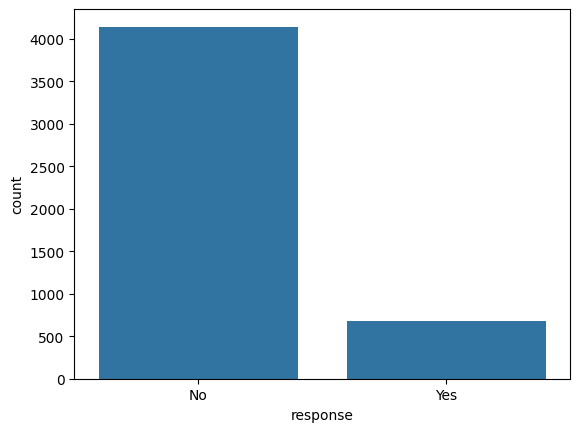

In [15]:
sns.countplot(x="response", data=df)

### Response rate by the sales channel

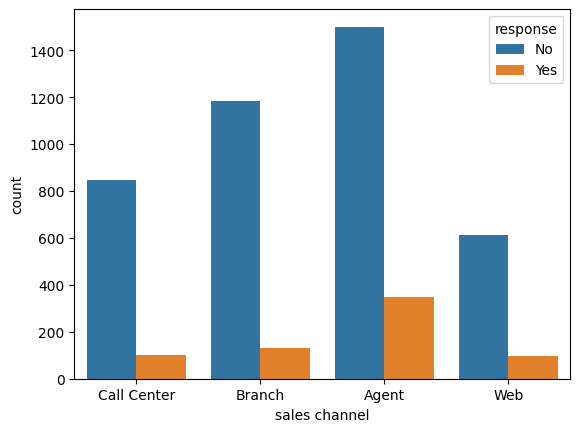

In [16]:
sns.countplot(x='sales channel', hue='response', data=df)
plt.show()

### Response rate by the total claim amount

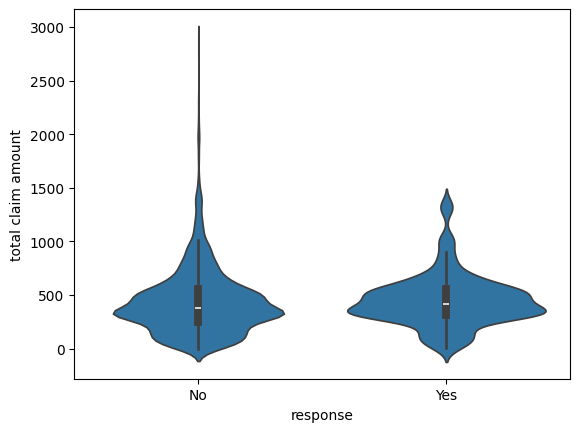

In [17]:
sns.violinplot(x='response', y='total claim amount', data=df)
plt.show()

### Response rate by income

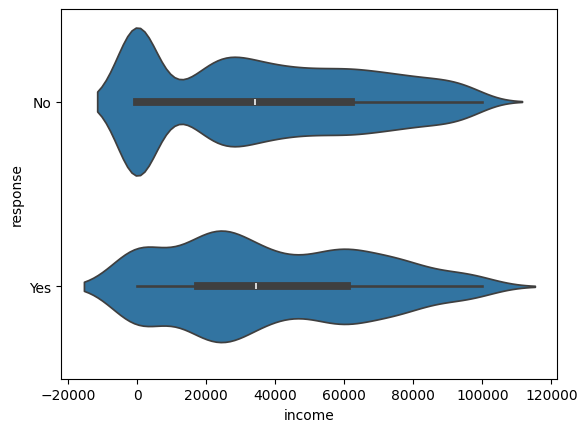

In [18]:
sns.violinplot(x='income', y='response', data=df)
plt.show()

## Intro Machine Learning

### Data types of the columns

In [19]:
num_df = df.select_dtypes(include=['int', 'float'])
num_df.drop('month', axis=1, inplace=True)
cat_df = df.select_dtypes(include=['object'])

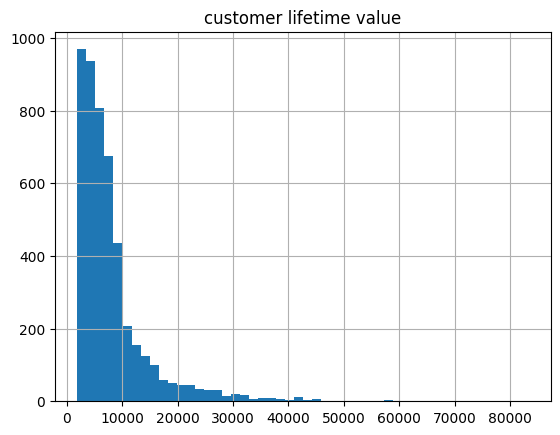

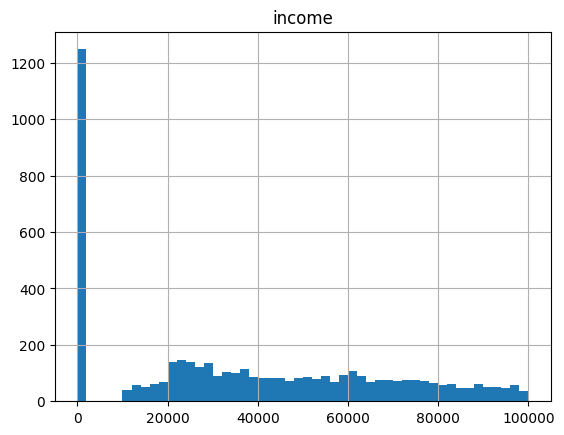

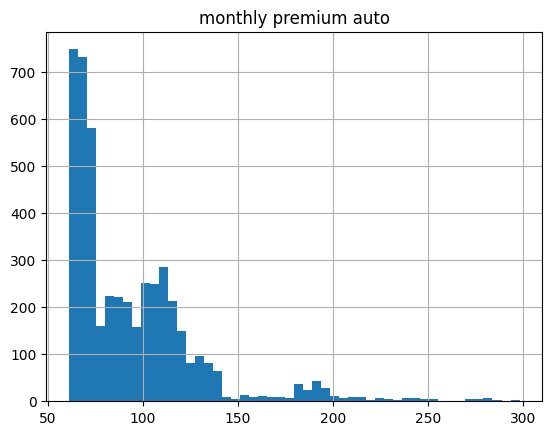

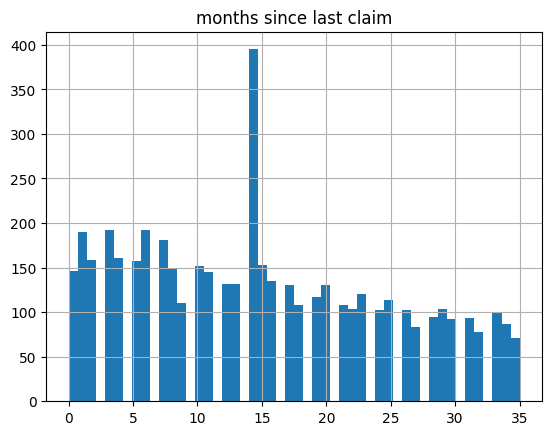

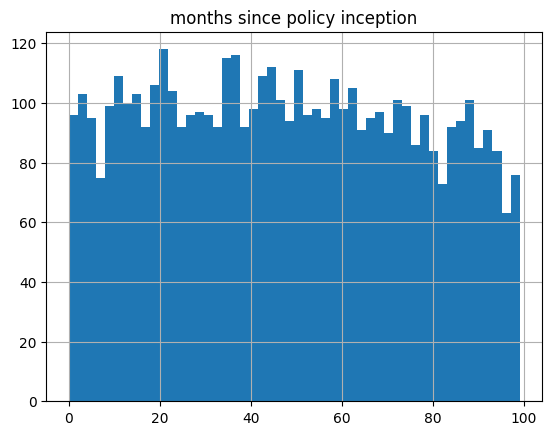

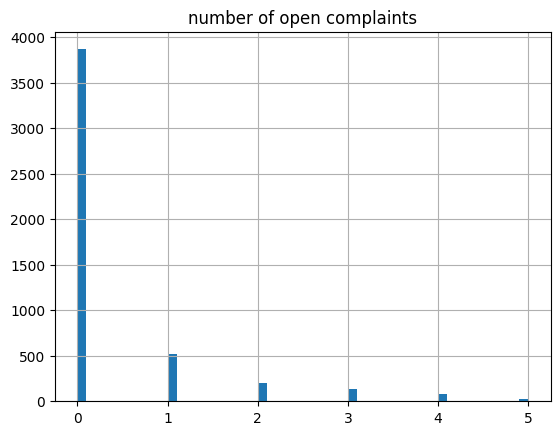

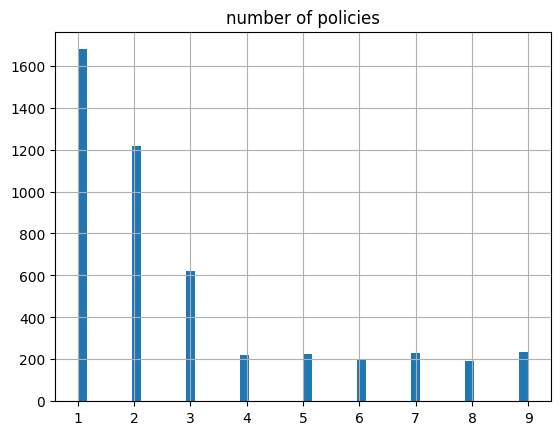

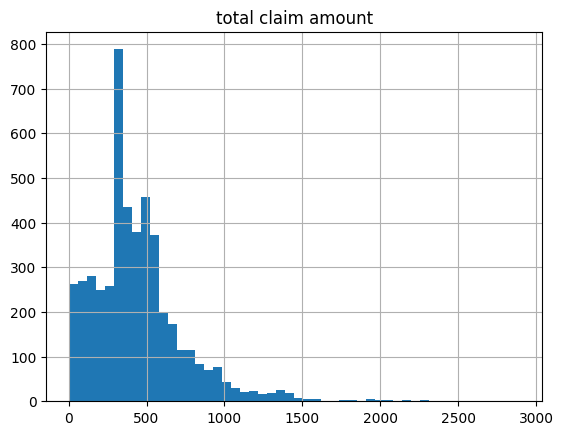

In [20]:
for column in num_df:
    df[column].hist(bins=50)
    plt.title(column)
    plt.show()

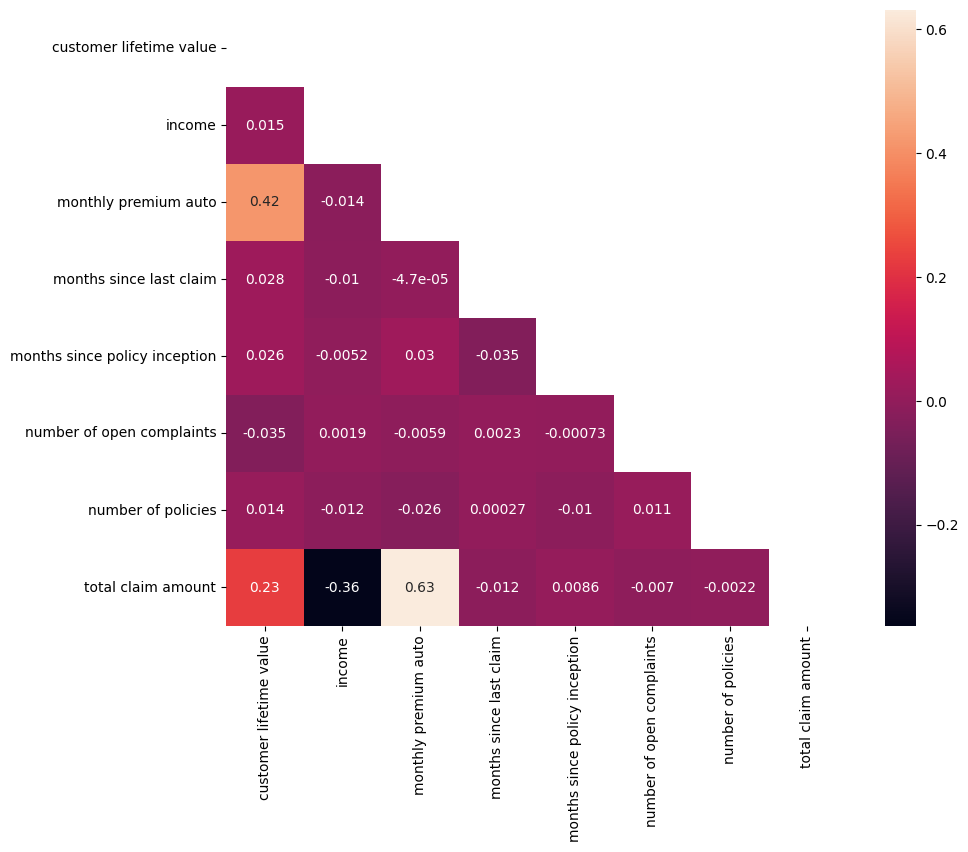

In [21]:
correlations_matrix = num_df.corr()

correlations_matrix["total claim amount"].sort_values(ascending=False)

mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True 


fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [24]:
high_correlation = correlations_matrix[abs(correlations_matrix) > 0.9].stack().reset_index()
high_correlation = high_correlation[high_correlation['level_0'] != high_correlation['level_1']]

In [25]:
if not high_correlation.empty:
    # Drop one of the features with high correlation
    features_to_drop = high_correlation['level_1'].unique()
    df.drop(columns=features_to_drop, inplace=True)

<Axes: >

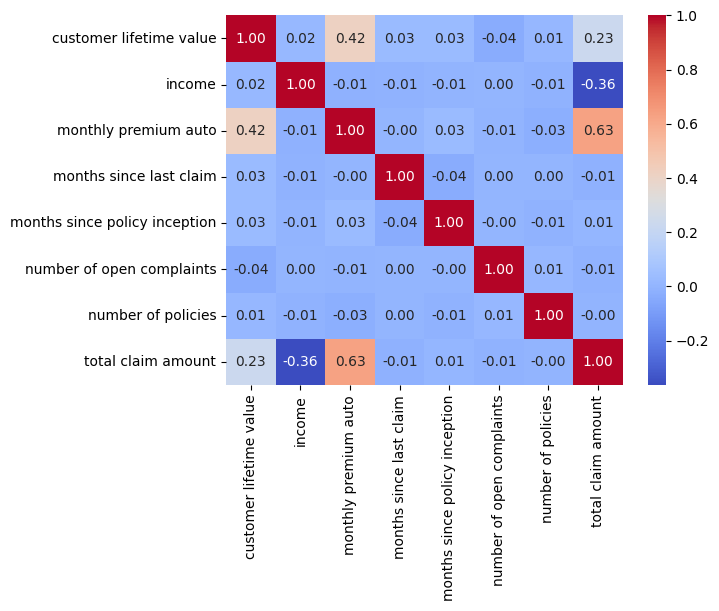

In [27]:
sns.heatmap(correlations_matrix, cmap='coolwarm', annot=True, fmt=".2f")